# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [5]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/Users/safin.yeh/Documents/3rd-ML100Days/'

### 之前做過的處理

In [6]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [9]:
age_data = app_train[['TARGET','DAYS_BIRTH']] 
age_data.head(10)

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046
3,0,19005
4,0,19932
5,0,16941
6,0,13778
7,0,18850
8,0,20099
9,0,14469


In [10]:
#print(age_data['DAYS_BIRTH'].head())
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365
print(age_data.head())

   TARGET  DAYS_BIRTH  YEARS_BIRTH
0       1        9461    25.920548
1       0       16765    45.931507
2       0       19046    52.180822
3       0       19005    52.068493
4       0       19932    54.608219


C:\Users\safin.yeh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
bin_range = [20,30,40,50,60,70]

age_data["YEARS_BIRTH_GRP"] = pd.cut(age_data["YEARS_BIRTH"],bin_range)
print(age_data['YEARS_BIRTH_GRP'].head(10))
age_data['YEARS_BIRTH_GRP'].value_counts()

0    (20, 30]
1    (40, 50]
2    (50, 60]
3    (50, 60]
4    (50, 60]
5    (40, 50]
6    (30, 40]
7    (50, 60]
8    (50, 60]
9    (30, 40]
Name: YEARS_BIRTH_GRP, dtype: category
Categories (5, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]


C:\Users\safin.yeh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: YEARS_BIRTH_GRP, dtype: int64

(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([20.51780822, 25.37808219, 30.23835616, 35.09863014, 39.95890411,
        44.81917808, 49.67945205, 54.53972603, 59.4       , 64.26027397,
        69.12054795]),
 <a list of 10 Patch objects>)

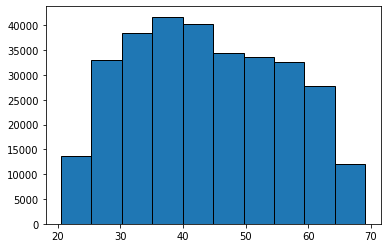

In [12]:
plt.hist(age_data['YEARS_BIRTH'], edgecolor = 'k',bins = 10)

In [13]:
age_data_groupby = age_data.groupby('YEARS_BIRTH_GRP').mean() 
age_data_groupby

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BIRTH_GRP,,,
"(20, 30]",0.114569,9717.044868,26.622041
"(30, 40]",0.095835,12819.966844,35.123197
"(40, 50]",0.076508,16335.968997,44.756079
"(50, 60]",0.061297,20066.449752,54.976575
"(60, 70]",0.049214,23124.915709,63.355933


Text(0, 0.5, 'target')

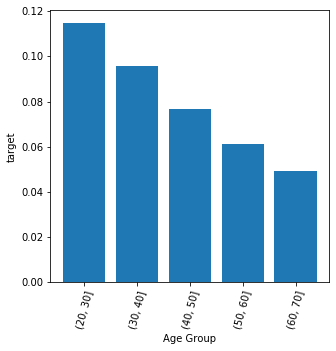

In [19]:
plt.figure(figsize = (5,5))
plt.bar(range(len(age_data_groupby.index)),age_data_groupby['TARGET'])

plt.xticks(range(len(age_data_groupby.index)), age_data_groupby.index, rotation = 75); plt.xlabel('Age Group'); plt.ylabel('target')